In [103]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from random import randint

In [104]:
# Carregando o dataset
(x_train_alt, y_train_alt), (x_test_alt, y_test_alt) = mnist.load_data()

In [105]:
# Configurando a rede neural convolucional
model_alt = tf.keras.models.Sequential()
model_alt.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_alt.add(tf.keras.layers.MaxPooling2D((3, 3)))
model_alt.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu'))
model_alt.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_alt.add(tf.keras.layers.Flatten())
model_alt.add(tf.keras.layers.Dense(64, activation="relu"))
model_alt.add(tf.keras.layers.Dense(10))

In [106]:
# Sumário da arquitetura da rede
model_alt.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 32)          12832     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 2, 2, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [107]:
# Compilando o modelo
model_alt.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [108]:
# Treinando o modelo
model_alt.fit(x_train_alt, y_train_alt, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 2.7312 - accuracy: 0.1093
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3010 - accuracy: 0.1118
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0330 - accuracy: 0.6532


In [109]:
# Testando o modelo
predictions_alt = model_alt.predict(x_test_alt)

313/313 [==============================] - 0s 1ms/step


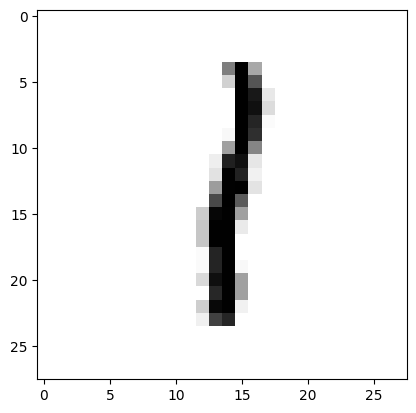

Prediction:  1


In [110]:
# Exibindo uma previsão
random_index = randint(0, len(predictions_alt))
plt.imshow(x_test_alt[random_index], cmap=plt.cm.binary)
plt.show()
print('Prediction: ', np.argmax(predictions_alt[random_index]))